In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('Dados/dataset_olist_preparado.csv', parse_dates=['order_purchase_timestamp','order_delivered_customer_date', 'order_estimated_delivery_date'])

In [5]:
# Criação da variável alvo: 1 = atrasado, 0 = no prazo
df['atraso_entrega'] = (df['order_delivered_customer_date'] > df['order_estimated_delivery_date']).astype(int)

# Excluir linhas onde datas são nulas (sem entrega)
df_model = df.dropna(subset=['order_delivered_customer_date', 'order_estimated_delivery_date'])


In [6]:
features = [
    'price', 
    'freight_value', 
    'product_weight_g', 
    'product_length_cm', 
    'product_height_cm', 
    'product_width_cm'
]

X = df_model[features]
y = df_model['atraso_entrega']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)



Relatório - Random Forest
              precision    recall  f1-score   support

           0       0.93      0.98      0.96     21332
           1       0.49      0.19      0.28      1813

    accuracy                           0.92     23145
   macro avg       0.71      0.59      0.62     23145
weighted avg       0.90      0.92      0.90     23145



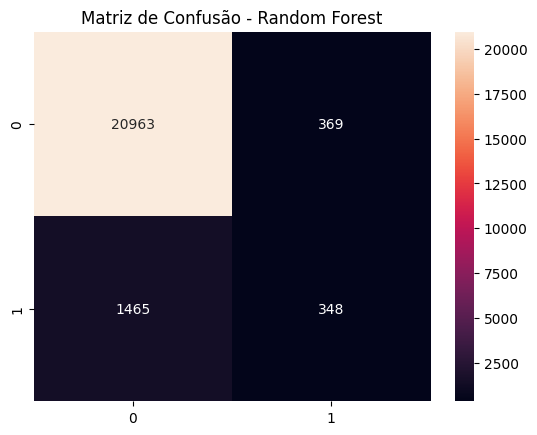

In [11]:
print("Relatório - Random Forest")
print(classification_report(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d')
plt.title('Matriz de Confusão - Random Forest')
plt.show()



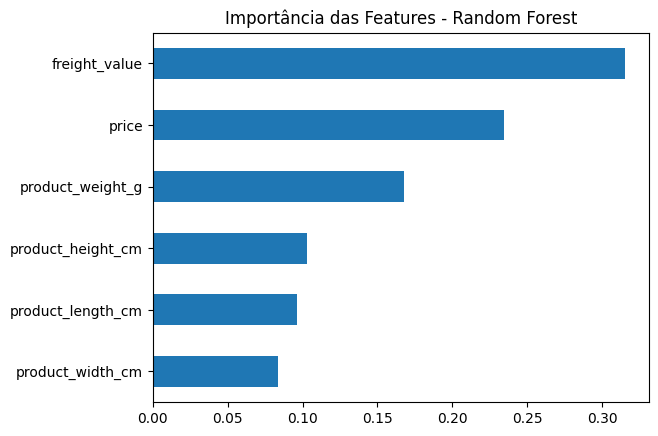

In [12]:
# Exibir importância das features no modelo de Random Forest
importances = pd.Series(rf.feature_importances_, index=features)
importances.sort_values().plot(kind='barh')
plt.title('Importância das Features - Random Forest')
plt.show()
